# Import Packages

In [1]:
# built-in
from ast import literal_eval
import itertools
import os
from pathlib import Path
import re

# third-party (pip install required)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from scipy import stats
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
# main data dir
DATA_DIR = '../../data/'
P1K_DATA_DIR = Path(DATA_DIR, 'precise1k')
# directory containing annotations
ANNOTATION_DIR = Path(DATA_DIR, 'annotation')
# directory containing subsample sample ID lists
SUBSAMPLE_ID_DIR = Path(P1K_DATA_DIR, 'subsamples')
# Directory containing ICA outputs
OPTICA_DIR = Path(P1K_DATA_DIR, 'optica_downsamples')
# directory to write IcaData for subsamples
SUBSAMPLE_ICA_DATA_DIR = Path(P1K_DATA_DIR, 'subsample_icadata')
# for figures
FIG_PATH = 'subsample_sets_figs'

# Load PRECISE-1K

In [3]:
p1k = load_json_model(os.path.join(P1K_DATA_DIR, 'precise1k.json.gz'))

# Choose Dimensionalities

In [8]:
trial_to_dim = {}

for trial_dir in os.listdir(OPTICA_DIR):
    
    # hacky skip
    if '.DS_Store' in trial_dir:
        continue
    
    trial_full_dir = Path(OPTICA_DIR, trial_dir)
    
    def load_M(dim):
        return pd.read_csv(os.path.join(trial_full_dir,str(dim),'S.csv'),index_col=0)

    def load_A(dim):
        return pd.read_csv(os.path.join(trial_full_dir,str(dim),'A.csv'),index_col=0)
    
    dims = sorted([int(x) for x in os.listdir(trial_full_dir) if '.DS_Store' not in x and int(x) <= 510])
    M_data = [load_M(dim) for dim in dims]
    A_data = [load_A(dim) for dim in dims]
    n_components = [m.shape[1] for m in M_data]
    
    final_m = M_data[-1]
    thresh = 0.7
    
    n_final_mods = []
    for m in tqdm(M_data):
        corrs = pd.DataFrame(index=final_m.columns,columns=m.columns)
        for col1 in final_m.columns:
            for col2 in m.columns:
                corrs.loc[col1,col2] = abs(stats.pearsonr(final_m[col1],m[col2])[0])
        n_final_mods.append(len(np.where(corrs > thresh)[0]))
        
    n_single_genes = []
    for m in tqdm(M_data):
        counter = 0
        for col in m.columns:
            sorted_genes = abs(m[col]).sort_values(ascending=False)
            if sorted_genes.iloc[0] > 2 * sorted_genes.iloc[1]:
                counter += 1
        n_single_genes.append(counter)
        
    non_single_components = np.array(n_components) - np.array(n_single_genes)
    DF_stats = pd.DataFrame([n_components,n_final_mods,non_single_components,n_single_genes],
                            index=['Robust Components','Final Components','Multi-gene Components',
                            'Single Gene Components'],
                            columns=dims).T
    DF_stats.sort_index(inplace=True)
    
    dimensionality = DF_stats[DF_stats['Final Components'] >= DF_stats['Multi-gene Components']].iloc[0].name
    print('Optimal Dimensionality:',dimensionality)
    
    trial_to_dim[trial_dir] = dimensionality
    
trial_dim_df = pd.DataFrame(data={'dim': trial_to_dim.values()}, index=trial_to_dim.keys())
trial_dim_df.to_csv('trial_dm_dump.csv')

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Optimal Dimensionality: 165


  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Optimal Dimensionality: 175


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Optimal Dimensionality: 165


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Optimal Dimensionality: 280


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Optimal Dimensionality: 280


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Optimal Dimensionality: 240


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Optimal Dimensionality: 280


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Optimal Dimensionality: 300


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Optimal Dimensionality: 240


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Optimal Dimensionality: 280


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Optimal Dimensionality: 280


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Optimal Dimensionality: 280


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Optimal Dimensionality: 260


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Optimal Dimensionality: 280


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Optimal Dimensionality: 220


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Optimal Dimensionality: 240


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Optimal Dimensionality: 280


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Optimal Dimensionality: 280


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Optimal Dimensionality: 200


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Optimal Dimensionality: 150


# Build IcaData Objects

In [9]:
trial_dim_df = pd.read_csv('trial_dm_dump.csv', index_col=0)

In [10]:
trial_to_icadata = {}

for i, (trial_id, trial_dim_row) in enumerate(trial_dim_df.iterrows()):
    print(f'{i+1}/{trial_dim_df.shape[0]}', end='\r')
    
    opt_trial_dir = Path(OPTICA_DIR, trial_id, str(trial_dim_row['dim']))
    
    # get the '0' column that contains the sample IDs for this subset
    subsample_ids = pd.read_csv(Path(SUBSAMPLE_ID_DIR, trial_id), index_col=0)['0']
    subsample_md = p1k.sample_table.loc[subsample_ids]

    ica_data = IcaData(
        M=os.path.join(opt_trial_dir,'S.csv'),
        A=os.path.join(opt_trial_dir,'A.csv'),
        gene_table=os.path.join(ANNOTATION_DIR,'gene_info.csv'),
        sample_table=subsample_md,
        trn=os.path.join(ANNOTATION_DIR,'TRN.csv'),
        optimize_cutoff=True
    )
    
    save_to_json(ica_data, Path(SUBSAMPLE_ICA_DATA_DIR, trial_id).as_posix(), compress=True)

# Compare Subsample iMs to P1K

In [11]:
trial_id_to_ica_data = {}

for trial_json in os.listdir(Path(SUBSAMPLE_ICA_DATA_DIR)):
    
    if '.json.gz' in trial_json:
        trial_id = trial_json.split('.json')[0]
        trial_id_to_ica_data[trial_id] = load_json_model(Path(SUBSAMPLE_ICA_DATA_DIR, trial_json).as_posix())

In [12]:
for i, (trial_id, trial_ica_data) in enumerate(trial_id_to_ica_data.items()):
    print(f'{i+1}/{len(trial_id_to_ica_data)}')
    
    match_rows = []
    for match in compare_ica(p1k.M, trial_ica_data.M, method='pearson')[0]:
        match_rows.append({
            'p1k_im': match[0],
            'subsamp_im': match[1],
            'method': 'pearson',
            'corr': match[2]
        })
    for match in compare_ica(p1k.M, trial_ica_data.M, method='spearman')[0]:
        match_rows.append({
            'p1k_im': match[0],
            'subsamp_im': match[1],
            'method': 'spearman',
            'corr': match[2]
        })
        
    match_df = pd.DataFrame(match_rows)
    
    for im, im_row in trial_ica_data.imodulon_table.iterrows():
        im_match = match_df[match_df['subsamp_im'] == im]
        if not im_match.empty:
            max_corr = np.argmax(im_match['corr'])
            max_corr_im = im_match.iloc[max_corr]['subsamp_im']
            max_corr_im_df = im_match[im_match['subsamp_im'] == max_corr_im]
            for _, max_corr_row in im_match.iterrows():
                trial_ica_data.imodulon_table.loc[im, 'P1K'] = max_corr_row['p1k_im']
                trial_ica_data.imodulon_table.loc[
                    im, f"P1K_{max_corr_row['method']}"
                ] = max_corr_row['corr']
                
    always_copy_cols = [
        'enrichment_category', 'system_category', 'functional_category', 'function', 'confidence',
        'note', 'single_gene_dominant_technical', 'tcs', 'regulon_discovery', 'ko'
    ]

    for i, (im, im_row) in enumerate(trial_ica_data.imodulon_table.iterrows()):
        # for some reason the non matches are also coming up as empty string; skip these
        if pd.notna(im_row['P1K']) and im_row['P1K'] != '':
            p1k_im_row = p1k.imodulon_table.loc[im_row['P1K']]
            print(f"\t({i+1}/{trial_ica_data.imodulon_table.shape[0]}) {im} -> {im_row['P1K']}")
            trial_ica_data.imodulon_table.loc[im, always_copy_cols] = p1k.imodulon_table.loc[im_row['P1K'], always_copy_cols]
            if pd.notna(p1k_im_row['trn_enrich_max_regs']):
                enrich_res = trial_ica_data.compute_trn_enrichment(im, max_regs=int(p1k_im_row['trn_enrich_max_regs']),
                                                evidence=literal_eval(p1k_im_row['trn_enrich_evidence']), force=True,
                                                method=p1k_im_row['trn_enrich_method'])
                enrich_res_with_reg = enrich_res[enrich_res['regulator'] == p1k_im_row['regulator']]
                if enrich_res_with_reg.empty:
                    continue
                trial_ica_data.imodulon_table.loc[
                    im,
                    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
                ] = enrich_res_with_reg.iloc[0][[
                    'regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs'
                ]]
                trial_ica_data.imodulon_table.loc[
                    im,
                    [
                        'trn_enrich_max_regs',
                        'trn_enrich_evidence',
                        'trn_enrich_method'
                    ]
                ] = [
                    p1k_im_row['trn_enrich_max_regs'],
                    p1k_im_row['trn_enrich_evidence'],
                    p1k_im_row['trn_enrich_method']
                ]
            elif pd.notna(p1k_im_row['compute_regulon_evidence']):
                enrich_res = trial_ica_data.compute_regulon_enrichment(im, p1k_im_row['regulator'],
                                                                 evidence=literal_eval(p1k_im_row['compute_regulon_evidence']))
                trial_ica_data.imodulon_table.loc[
                    im,
                    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
                ] = enrich_res[
                    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
                ]
                trial_ica_data.imodulon_table.loc[im, 'regulator'] = p1k_im_row['regulator']
                trial_ica_data.imodulon_table.loc[im, 'compute_regulon_evidence'] = p1k_im_row['compute_regulon_evidence']
                
    save_to_json(trial_ica_data, Path(SUBSAMPLE_ICA_DATA_DIR, trial_id).as_posix(), compress=True)

1/20
	(1/170) 0 -> Pyruvate-2
	(2/170) 1 -> FHL
	(3/170) 2 -> Lysine/T2SS
	(4/170) 3 -> FliA
	(5/170) 4 -> Leucine
	(6/170) 5 -> Nucleotide Stress
	(7/170) 6 -> Phosphate-1
	(8/170) 7 -> Thiamine-1
	(9/170) 8 -> baeR KO
	(10/170) 9 -> Biofilm
	(11/170) 10 -> UC-3
	(12/170) 11 -> Sulfoquinovose
	(13/170) 12 -> glrR KO
	(14/170) 13 -> ArcA
	(15/170) 14 -> Ferric Citrate
	(16/170) 15 -> Lrp
	(17/170) 16 -> crp KO-1
	(18/170) 17 -> ymdG
	(19/170) 18 -> Thr/Ser-1
	(20/170) 19 -> pgi KO
	(21/170) 20 -> Tyr/Trp/Phe
	(22/170) 21 -> e14 Del
	(23/170) 22 -> IS Elements-1
	(24/170) 23 -> YmfT
	(25/170) 24 -> Leu/Val/Ile
	(26/170) 25 -> Ribose
	(27/170) 26 -> Fnr-3
	(28/170) 27 -> Curli-1
	(29/170) 28 -> Rhamnose
	(30/170) 29 -> Phosphate-2
	(31/170) 30 -> Sulfoquinovose
	(32/170) 31 -> Sugar Diacid
	(33/170) 32 -> RpoS
	(34/170) 33 -> Cysteine-1
	(35/170) 34 -> FliA
	(36/170) 35 -> GlcNAc
	(37/170) 36 -> Capsule
	(38/170) 37 -> arcA/luxS KO
	(39/170) 38 -> Tryptophan
	(40/170) 39 -> ROS TALE Del-

# Subsample iModulon Lineages

In [4]:
trial_id_to_ica_data = {}

for trial_json in os.listdir(Path(SUBSAMPLE_ICA_DATA_DIR)):
    
    if '.json.gz' in trial_json:
        trial_id = trial_json.split('.json')[0]
        trial_id_to_ica_data[trial_id] = load_json_model(Path(SUBSAMPLE_ICA_DATA_DIR, trial_json).as_posix())

In [5]:
# restructure to have each trial grouped together
by_trial_and_frac = {}

for trial_id, trial_ica_data in trial_id_to_ica_data.items():
    
    trial_num = int(trial_id[5])
    trial_frac = float(trial_id.split('_')[1].replace('frac', ''))
    trial_n = int(trial_id.split('_')[2].replace('n', ''))
    
    if trial_num in by_trial_and_frac:
        by_trial_and_frac[trial_num][trial_frac] = trial_ica_data
    else:
        by_trial_and_frac[trial_num] = {trial_frac: trial_ica_data}

In [6]:
def reg_coverage_for_ica_data(ica_dat):
    
    trn = p1k.trn.copy()
    
    all_p1k_regs = []
    all_p1k_reg_interacts = []
    for _, imod_row in ica_dat.imodulon_table.iterrows():
        im_regs = imod_row['regulator']
        if pd.notna(im_regs):
            regs = re.split(f'/|\+', im_regs)
            all_p1k_regs.extend(regs)
            im_genes = ica_dat.view_imodulon(imod_row.name).index
            all_p1k_reg_interacts.extend(list(itertools.product(regs, im_genes)))

    all_p1k_regs = list(set(all_p1k_regs))
    all_p1k_reg_interacts = list(set(all_p1k_reg_interacts))

    # now annotate the trn with the info from imodulon table
    trn = trn.assign(
        reg_in_ims=trn['regulator'].apply(lambda reg: reg in all_p1k_regs),
        interact_in_ims=trn.apply(lambda row: (row['regulator'], row['gene_id']) in all_p1k_reg_interacts, axis=1)
    )

    trn = trn[trn['regulator'] != 'RpoD']

    by_reg = trn.groupby('regulator').sum()
    by_reg = by_reg.assign(
        evidence=by_reg.evidence.apply(lambda ev: 'Weak' if ev == 0 else 'Strong'),
        reg_in_ims=by_reg.reg_in_ims.apply(lambda in_im: in_im != 0),
        n_interact=trn.groupby('regulator').count().get('gene_name')
    )
    
    return trn, by_reg

In [7]:
trial_info_rows = []

for trial_num, trial_fracs_dict in by_trial_and_frac.items():
    
    trial_fracs_dict[1.0] = p1k
    
    for trial_frac, ica_data in trial_fracs_dict.items():
        
        im_table = ica_data.imodulon_table
        reg_im_table = im_table[im_table['enrichment_category'] == 'Regulatory']
        
        trn_reg_cov, trn_cov_by_reg = reg_coverage_for_ica_data(ica_data)
        
        n_strong_in_im = trn_cov_by_reg[(trn_cov_by_reg['evidence'] == 'Strong') & (trn_cov_by_reg['reg_in_ims'])].shape[0]
        n_strong_total = trn_cov_by_reg[(trn_cov_by_reg['evidence'] == 'Strong')].shape[0]
        frac_reg_in_im_strong = n_strong_in_im / n_strong_total

        all_in_im = trn_cov_by_reg[trn_cov_by_reg['reg_in_ims']].shape[0]
        all_total = trn_cov_by_reg.shape[0]
        frag_reg_in_im_all = all_in_im / all_total

        n_strong_interact_in_im = trn_reg_cov[(trn_reg_cov['evidence'] > 0) & (trn_reg_cov['interact_in_ims'])].shape[0]
        n_strong_interact_w_reg_in_im = trn_reg_cov[(trn_reg_cov['evidence'] > 0) & (trn_reg_cov['reg_in_ims'])].shape[0]
        n_strong_interact = trn_reg_cov[(trn_reg_cov['evidence'] > 0)].shape[0]
        frac_interact_in_im_strong = n_strong_interact_in_im / n_strong_interact
        frac_interact_w_reg_in_im_strong = n_strong_interact_w_reg_in_im / n_strong_interact

        all_interact_in_im = trn_reg_cov[trn_reg_cov['interact_in_ims']].shape[0]
        n_interact_w_reg_in_im = trn_reg_cov[trn_reg_cov['reg_in_ims']].shape[0]
        all_interact_total = trn_reg_cov.shape[0]
        frac_interact_in_im_all = all_interact_in_im / all_interact_total
        frac_interact_w_reg_in_im_all = n_interact_w_reg_in_im / all_interact_total
        
        trial_info_rows.append({
            'trial': trial_num,
            'frac': trial_frac,
            'n_samples': ica_data.sample_table.shape[0],
            'n_ims': im_table.shape[0],
            'n_reg_ims': reg_im_table.shape[0],
            'n_reg_in_im_strong': n_strong_in_im,
            'n_reg_strong_total': n_strong_total,
            'frac_reg_in_im_strong': frac_reg_in_im_strong,
            'n_reg_in_im_all': all_in_im,
            'n_reg_all_total': all_total,
            'frac_reg_in_im_all': frag_reg_in_im_all,
            'n_ri_in_im_strong': n_strong_interact_in_im,
            'n_ri_w_reg_in_im_strong': n_strong_interact_w_reg_in_im,
            'n_ri_strong': n_strong_interact,
            'frac_ri_in_im_strong': frac_interact_in_im_strong,
            'frac_ri_w_reg_in_im_strong': frac_interact_w_reg_in_im_strong,
            'n_ri_in_im_all': all_interact_in_im,
            'n_ri_in_w_reg_in_im_all': n_interact_w_reg_in_im,
            'n_ri_all': all_interact_total,
            'frac_ri_in_im_all': frac_interact_in_im_all,
            'frac_ri_w_reg_in_im_all': frac_interact_w_reg_in_im_all
        })
        
trial_reg_coverage_df = pd.DataFrame(trial_info_rows)

/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_25524/2981074803.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_reg = trn.groupby('regulator').sum()
/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_25524/2981074803.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_reg = trn.groupby('regulator').sum()
/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_25524/2981074803.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns

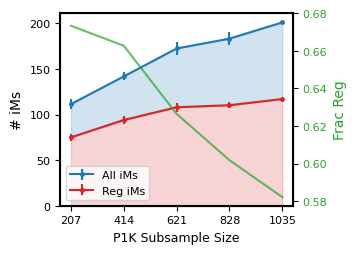

In [8]:
trial_reg_coverage_df = trial_reg_coverage_df.assign(
    frac_reg=(trial_reg_coverage_df['n_reg_ims'] / trial_reg_coverage_df['n_ims'])
)
averaged_by_frac = trial_reg_coverage_df.groupby('frac').mean()
std_by_frac = trial_reg_coverage_df.groupby('frac').std()

_, ax = plt.subplots(figsize=(3, 2.5))

ax2 = ax.twinx()

ax.errorbar(averaged_by_frac['n_samples'], averaged_by_frac['n_ims'], yerr=std_by_frac['n_ims'], fmt='.-', ms=5, color='tab:blue', label='All iMs')
ax.errorbar(averaged_by_frac['n_samples'], averaged_by_frac['n_reg_ims'], yerr=std_by_frac['n_reg_ims'], fmt='.-', ms=5, color='tab:red', label='Reg iMs')

ax.fill_between(averaged_by_frac['n_samples'], averaged_by_frac['n_reg_ims'], color='tab:red', alpha=0.2)
ax.fill_between(averaged_by_frac['n_samples'], averaged_by_frac['n_reg_ims'], y2=averaged_by_frac['n_ims'], color='tab:blue', alpha=0.2)

ax2.plot(averaged_by_frac['n_samples'],
             averaged_by_frac['frac_reg'], color='tab:green', zorder=-10, alpha=0.7)

ax.legend(fontsize=8, loc='lower left')
ax.set_ylim(bottom=0)

for loc, s in ax.spines.items():
    s.set_linewidth(1.5)
    s.set_color('k')

ax.set_xticks(averaged_by_frac['n_samples'])
ax.set_xlabel('P1K Subsample Size', fontsize=9)
ax.set_ylabel('# iMs')
ax.tick_params(axis='both', labelsize=8)

ax2.set_yticks(np.arange(0.58, 0.70, 0.02))
ax2.tick_params(axis='both', labelsize=8)
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.set_ylabel('Frac Reg', color='tab:green')

plt.savefig(os.path.join(FIG_PATH, 'subsample_num_ims.svg'), bbox_inches='tight', dpi=400)
plt.savefig(os.path.join(FIG_PATH, 'subsample_num_ims.png'), bbox_inches='tight', dpi=400)

In [151]:
averaged_by_frac

,trial,n_samples,n_ims,n_reg_ims,n_reg_in_im_strong,n_reg_strong_total,frac_reg_in_im_strong,n_reg_in_im_all,n_reg_all_total,frac_reg_in_im_all,...,n_ri_w_reg_in_im_strong,n_ri_strong,frac_ri_in_im_strong,frac_ri_w_reg_in_im_strong,n_ri_in_im_all,n_ri_in_w_reg_in_im_all,n_ri_all,frac_ri_in_im_all,frac_ri_w_reg_in_im_all,frac_reg
frac,,,,,,,,,,,,,,,,,,,,,
0.2,2.0,207.0,111.4,75.0,62.6,190.0,0.329474,80.6,358.0,0.225140,...,2498.6,3295.0,0.186464,0.758300,1172.0,5857.8,8615.0,0.136042,0.679954,0.673310
0.4,2.0,414.0,141.8,94.0,77.0,190.0,0.405263,99.8,358.0,0.278771,...,2694.8,3295.0,0.250683,0.817845,1552.8,6366.4,8615.0,0.180244,0.738990,0.662670
0.6,2.0,621.0,172.4,108.0,84.2,190.0,0.443158,110.2,358.0,0.307821,...,2773.8,3295.0,0.284249,0.841821,1777.6,6627.4,8615.0,0.206338,0.769286,0.626391
0.8,2.0,828.0,183.2,110.2,83.6,190.0,0.440000,110.2,358.0,0.307821,...,2773.4,3295.0,0.293839,0.841700,1844.8,6617.8,8615.0,0.214138,0.768172,0.601764
1.0,2.0,1035.0,201.0,117.0,91.0,190.0,0.478947,120.0,358.0,0.335196,...,2838.0,3295.0,0.342944,0.861305,2100.0,6802.0,8615.0,0.243761,0.789553,0.582090


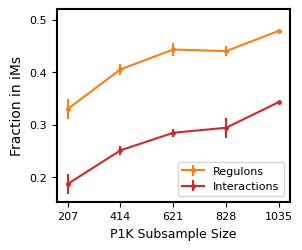

In [9]:
_, ax = plt.subplots(figsize=(3, 2.5))

ax.errorbar(averaged_by_frac['n_samples'], averaged_by_frac['frac_reg_in_im_strong'],
            yerr=std_by_frac['frac_reg_in_im_strong'], fmt='.-', ms=5, color='tab:orange', label='Regulons')
ax.errorbar(averaged_by_frac['n_samples'], averaged_by_frac['frac_ri_in_im_strong'],
            yerr=std_by_frac['frac_ri_in_im_strong'], fmt='.-', ms=5, color='tab:red', label='Interactions')

ax.set_yticks(np.arange(0.2, 0.6, 0.1))
ax.set_ylim(top=0.52)

for loc, s in ax.spines.items():
    s.set_linewidth(1.5)
    s.set_color('k')
    
ax.legend(fontsize=8, loc='lower right')

ax.set_xticks(averaged_by_frac['n_samples'])
ax.set_xlabel('P1K Subsample Size', fontsize=9)
ax.set_ylabel('Fraction in iMs')
ax.tick_params(axis='both', labelsize=8)

plt.savefig(os.path.join(FIG_PATH, 'subsample_reg_fracs.svg'), bbox_inches='tight', dpi=400)
plt.savefig(os.path.join(FIG_PATH, 'subsample_reg_fracs.png'), bbox_inches='tight', dpi=400)